In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
%matplotlib inline 


In [28]:
path = r'data.txt'

In [4]:
tweets_data = []
tweets_file = open(path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
len(tweets_data)        

5535

In [5]:
tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))

df1 =tweets['country']
tweets['country']=tweets['country'].fillna('India')
tweets['country']

tweets.head()

,text,lang,country
0,RT @rahmankhanmmc: @speedmystic @sagarikaghose...,hi,India
1,RT @dhruv_rathee: 75yr old man killed for supp...,en,India
2,People don't vote for demonetisation GST and l...,en,India
3,RT @sudhirchaudhary: अब भारत सिर्फ़ नाम का धर्...,hi,India
4,RT @niiravmodi: 16 April ko Modi ji ke sath ha...,hi,India


In [6]:
pd.value_counts(tweets['country'])


India                   5529
भारत                       3
Pakistan                   1
United Arab Emirates       1
United States              1
Name: country, dtype: int64

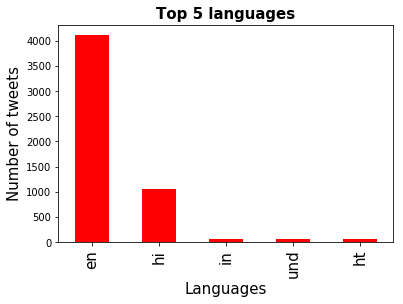

In [7]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

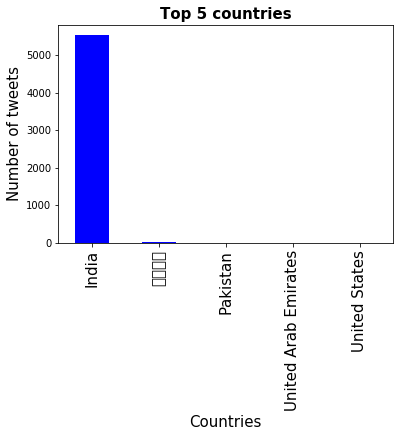

In [8]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

In [9]:

tweets['text'].head()

0    RT @rahmankhanmmc: @speedmystic @sagarikaghose...
1    RT @dhruv_rathee: 75yr old man killed for supp...
2    People don't vote for demonetisation GST and l...
3    RT @sudhirchaudhary: अब भारत सिर्फ़ नाम का धर्...
4    RT @niiravmodi: 16 April ko Modi ji ke sath ha...
Name: text, dtype: object

In [10]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

tweets['clean_text'] = np.vectorize(remove_pattern)(tweets['text'], "@[\w]*")
tweets['clean_text'].head()
       

0    RT :    Aap kis dhuniye pe rehte ho? Mars me? ...
1    RT : 75yr old man killed for supporting Modi?\...
2    People don't vote for demonetisation GST and l...
3    RT : अब भारत सिर्फ़ नाम का धर्म निरपेक्ष देश ब...
4    RT : 16 April ko Modi ji ke sath hamari 1 mont...
Name: clean_text, dtype: object

In [25]:
tweets['clean_text'] =tweets['clean_text'].str.replace("[^a-zA-Z#]", " ")
tweets['clean_text']= tweets['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: x.split())

tweets['clean_text'].head()

0    [dhuniye, rehte, Mars, Sirf, dhuniye, rehte, M...
1    [dhuniye, rehte, Mars, Sirf, dhuniye, rehte, M...
2    [dhuniye, rehte, Mars, Sirf, dhuniye, rehte, M...
3    [dhuniye, rehte, Mars, Sirf, dhuniye, rehte, M...
4    [dhuniye, rehte, Mars, Sirf, dhuniye, rehte, M...
Name: clean_text, dtype: object

In [27]:
df =[]
i=0
while i<5535:
    
    df = df+ tweets['clean_text'][i]
    i=i+1
    
str(df)
len(df)

1361610

In [ ]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  


In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 6).generate(comment_words) 
  
# plot the WordCloud image  , let                      
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()